<a href="https://colab.research.google.com/github/guevara001/Challenge_Telecom_X/blob/main/Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_json = pd.read_json('/content/TelecomX_Data.json')
data_json.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

### Normalizacion de columnas anidadas

In [6]:
columnas_norm = ['customer', 'phone', 'internet', 'account']

data_json_norm = pd.DataFrame()
for columna in columnas_norm:
    data_json_norm = pd.concat([data_json_norm, pd.json_normalize(data_json[columna])], axis=1)
data_json_norm = pd.concat([data_json.drop(columns=columnas_norm), data_json_norm], axis=1)
data_json_norm

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [7]:
data_json_norm.rename(columns={
    'customerID': 'id',
    'Churn':'cancelacion',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_de_65',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'meses_de_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'Soporte_en_linea',
    'DeviceProtection': 'protecc_disp',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'servicio_tv',
    'StreamingMovies': 'servicio_peliculas',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'metodo_pago',
    'Contract': 'tipo_contrato',
    'Charges.Monthly': 'total_pagos_mensuales',
    'Charges.Total': 'ingreso_total_cliente'
}, inplace=True)

In [8]:
#verificar valores unicos en cada columna
for col in data_json_norm.columns:
    print(f"valores unicos en la columna'{col}: {data_json_norm[col].unique()}'")
    if data_json_norm[col].nunique() < 50:
        print(data_json_norm[col].unique())
        print('-' * 50)

valores unicos en la columna'id: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']'
valores unicos en la columna'cancelacion: ['No' 'Yes' '']'
['No' 'Yes' '']
--------------------------------------------------
valores unicos en la columna'genero: ['Female' 'Male']'
['Female' 'Male']
--------------------------------------------------
valores unicos en la columna'mayor_de_65: [0 1]'
[0 1]
--------------------------------------------------
valores unicos en la columna'pareja: ['Yes' 'No']'
['Yes' 'No']
--------------------------------------------------
valores unicos en la columna'dependientes: ['Yes' 'No']'
['Yes' 'No']
--------------------------------------------------
valores unicos en la columna'meses_de_contrato: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]'
valores unicos 

In [9]:

data_json_norm.describe()

,mayor_de_65,meses_de_contrato,total_pagos_mensuales
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [10]:
#data_json_norm['ingreso_total_cliente'] = data_json_norm['ingreso_total_cliente'].replace('', np.nan)
data_json_norm['ingreso_total_cliente'].apply(lambda x: str(x).strip() == '').sum()

np.int64(11)

In [11]:
data_json_norm['ingreso_total_cliente'] = data_json_norm['ingreso_total_cliente'].apply(
    lambda x: 0 if str(x).strip() == '' else x
)


In [12]:
data_json_norm['ingreso_total_cliente'] = data_json_norm['ingreso_total_cliente'].astype(np.float64)

In [13]:
data_json_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7267 non-null   object 
 1   cancelacion            7267 non-null   object 
 2   genero                 7267 non-null   object 
 3   mayor_de_65            7267 non-null   int64  
 4   pareja                 7267 non-null   object 
 5   dependientes           7267 non-null   object 
 6   meses_de_contrato      7267 non-null   int64  
 7   servicio_telefonico    7267 non-null   object 
 8   lineas_multiples       7267 non-null   object 
 9   servicio_internet      7267 non-null   object 
 10  seguridad_en_linea     7267 non-null   object 
 11  Soporte_en_linea       7267 non-null   object 
 12  protecc_disp           7267 non-null   object 
 13  soporte_tecnico        7267 non-null   object 
 14  servicio_tv            7267 non-null   object 
 15  serv

### Creación de columna de cuentas diarias

In [14]:
data_json_norm['cuentas_diarias'] = data_json_norm['total_pagos_mensuales'] / 30

### Estandarización y transformación de datos (opcional)

In [15]:
data_json_norm

,id,cancelacion,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,protecc_disp,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,total_pagos_mensuales,ingreso_total_cliente,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [16]:
data_json_norm['tipo_contrato'] = data_json_norm['tipo_contrato'].str.lower()

data_json_norm['metodo_pago'] = data_json_norm['metodo_pago'].str.lower()

data_json_norm['servicio_internet'] = data_json_norm['servicio_internet'].str.lower()

data_json_norm['genero'] = data_json_norm['genero'].str.lower()


In [17]:
columnas_boolean = ['cancelacion', 'pareja', 'dependientes',
                    'servicio_telefonico','seguridad_en_linea',
                    'Soporte_en_linea', 'soporte_tecnico',
                    'servicio_tv', 'servicio_peliculas', 'facturas_electronicas']

In [20]:
data_json_norm[columnas_boolean] = data_json_norm[columnas_boolean].replace({'Yes': 1, 'No': 0})

In [22]:
data_json_norm['lineas_multiples'] = (data_json_norm['lineas_multiples'].replace({'Yes': 1,'No': 0,
                                                                                  'No phone service': 0}).fillna(0).astype(int))
data_json_norm['seguridad_en_linea'] = (data_json_norm['seguridad_en_linea'].replace({'Yes': 1,'No': 0,
                                                                                  'No internet service': 0}).fillna(0).astype(int))
data_json_norm['Soporte_en_linea'] = (data_json_norm['Soporte_en_linea'].replace({'Yes': 1,'No': 0,
                                                                                  'No internet service': 0}).fillna(0).astype(int))
data_json_norm['protecc_disp'] = (data_json_norm['protecc_disp'].replace({'Yes': 1,'No': 0,
                                                                                  'No internet service': 0}).fillna(0).astype(int))

data_json_norm['soporte_tecnico'] = (data_json_norm['soporte_tecnico'].replace({'Yes': 1,'No': 0,
                                                                                  'No internet service': 0}).fillna(0).astype(int))
data_json_norm['servicio_tv'] = (data_json_norm['servicio_tv'].replace({'Yes': 1,'No': 0,
                                                                                  'No internet service': 0}).fillna(0).astype(int))
data_json_norm['servicio_peliculas'] = (data_json_norm['servicio_peliculas'].replace({'Yes': 1,'No': 0,
                                                                                  'No internet service': 0}).fillna(0).astype(int))

#📊 Carga y análisis

In [23]:
#Eliminar filas vacias
data_json_fil_vacias = data_json_norm[data_json_norm['cancelacion'] == '']
data_json_norm = data_json_norm.drop(data_json_fil_vacias.index)
data_json_norm.reset_index(drop=True, inplace=True)
data_json_norm.head()

,id,cancelacion,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,protecc_disp,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,total_pagos_mensuales,ingreso_total_cliente,cuentas_diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [24]:
data_json_norm.columns

Index(['id', 'cancelacion', 'genero', 'mayor_de_65', 'pareja', 'dependientes',
       'meses_de_contrato', 'servicio_telefonico', 'lineas_multiples',
       'servicio_internet', 'seguridad_en_linea', 'Soporte_en_linea',
       'protecc_disp', 'soporte_tecnico', 'servicio_tv', 'servicio_peliculas',
       'tipo_contrato', 'facturas_electronicas', 'metodo_pago',
       'total_pagos_mensuales', 'ingreso_total_cliente', 'cuentas_diarias'],
      dtype='object')

In [25]:
data_json_norm['tiempo_de_contrato'] = data_json_norm['ingreso_total_cliente']/data_json_norm['total_pagos_mensuales']
data_json_norm.head()



,id,cancelacion,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,total_pagos_mensuales,ingreso_total_cliente,cuentas_diarias,tiempo_de_contrato
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,1,1,0,one year,1,mailed check,65.6,593.30,2.186667,9.044207
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667,9.055092
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333,3.800406
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667,12.631122
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667,3.187128


In [26]:
data_json_norm['cancelacion'].value_counts()

,count
cancelacion,
0,5174
1,1869


In [27]:
data_json_norm['ingreso_total_cliente'].describe()

,ingreso_total_cliente
count,7043.000000
mean,2279.734304
std,2266.794470
min,0.000000
25%,398.550000
50%,1394.550000
75%,3786.600000
max,8684.800000


In [28]:
data_json_norm['total_pagos_mensuales'].describe()

,total_pagos_mensuales
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [29]:
data_json_norm['cuentas_diarias'].describe()

,cuentas_diarias
count,7043.000000
mean,2.158723
std,1.003002
min,0.608333
25%,1.183333
50%,2.345000
75%,2.995000
max,3.958333


### Análisis de Cancelacion por Género

In [30]:
cancelacion_por_genero = data_json_norm.groupby(['genero', 'cancelacion']).size().unstack()
cancelacion_por_genero

cancelacion,0,1
genero,,
female,2549,939
male,2625,930


###  Analisis de Cancelacion por Contrato

In [31]:
cance_por_contrato = data_json_norm.groupby(['tipo_contrato', 'cancelacion']).size().unstack()
cance_por_contrato

cancelacion,0,1
tipo_contrato,,
month-to-month,2220,1655
one year,1307,166
two year,1647,48


### Analisis de Cancelacion por Método de Pago

In [32]:
cancelacion_metodo_pago = data_json_norm.groupby(['metodo_pago', 'cancelacion']).size().unstack()
cancelacion_metodo_pago


cancelacion,0,1
metodo_pago,,
bank transfer (automatic),1286,258
credit card (automatic),1290,232
electronic check,1294,1071
mailed check,1304,308


In [33]:
con_pareja = data_json_norm[data_json_norm['pareja'] == 1]['cancelacion'].value_counts()
sin_pareja = data_json_norm[data_json_norm['pareja'] == 0]['cancelacion'].value_counts()
con_pareja_df = pd.DataFrame(con_pareja)
sin_pareja_df = pd.DataFrame(sin_pareja)


### Analisis de Cancelacion por Edad

In [34]:
cancelacion_por_edad = data_json_norm.groupby(['mayor_de_65', 'cancelacion']).size().unstack()
cancelacion_por_edad

cancelacion,0,1
mayor_de_65,,
0,4508,1393
1,666,476


In [35]:
cancelacion_servicio_internet = data_json_norm.groupby(['servicio_internet', 'cancelacion']).size().unstack()
cancelacion_servicio_internet

cancelacion,0,1
servicio_internet,,
dsl,1962,459
fiber optic,1799,1297
no,1413,113


In [36]:
data_json_norm['meses_de_contrato'] = data_json_norm['meses_de_contrato'].astype(np.float64)


### Graficos de Cancelacion por Género

In [37]:
hombres = data_json_norm[data_json_norm['genero'] == 'male']['cancelacion'].value_counts()
mujeres= data_json_norm[data_json_norm['genero'] == 'female']['cancelacion'].value_counts()


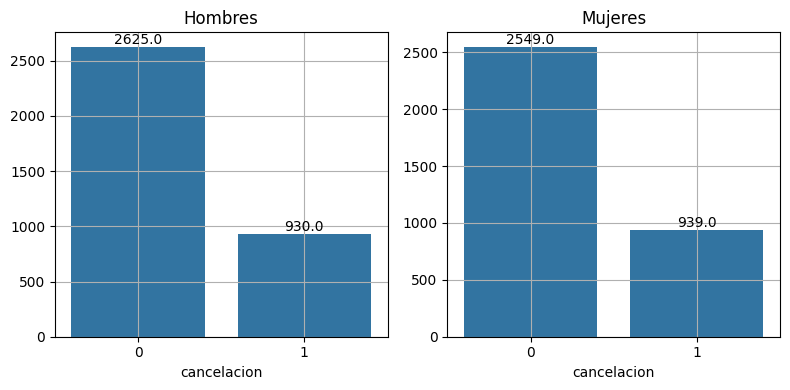

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Gráfico para hombres
ax[0] = sns.barplot(x=hombres.index, y=hombres.values, ax=ax[0])
ax[0].set_title('Hombres')
ax[0].grid()

# Agregar etiquetas a las barras de hombres
for i, value in enumerate(hombres.values):
    ax[0].text(i, value, f'{value:.1f}', ha='center', va='bottom')

# Gráfico para mujeres
ax[1] = sns.barplot(x=mujeres.index, y=mujeres.values, ax=ax[1])
ax[1].set_title('Mujeres')
ax[1].grid()

# Agregar etiquetas a las barras de mujeres
for i, value in enumerate(mujeres.values):
    ax[1].text(i, value, f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Grafico de Cantidad de Cancelación

/tmp/ipython-input-657973689.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x='cancelacion', data=data_json_norm, palette=['#0000FF', '#c62503'])


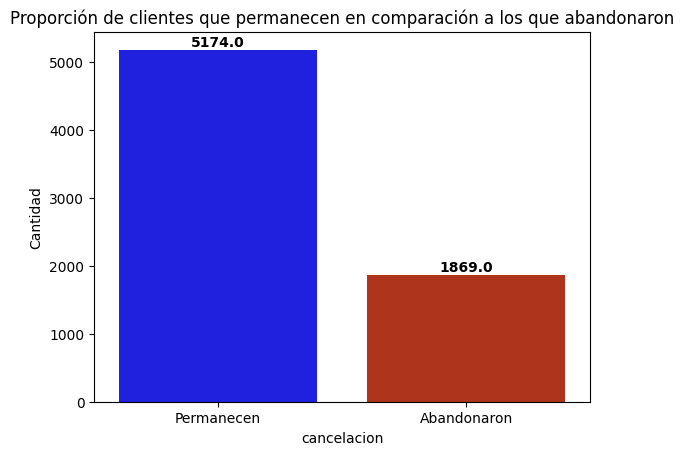

In [41]:
ax =sns.countplot(x='cancelacion', data=data_json_norm, palette=['#0000FF', '#c62503'])
plt.title('Proporción de clientes que permanecen en comparación a los que abandonaron')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Permanecen', 'Abandonaron'])

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

#📄Informe Final

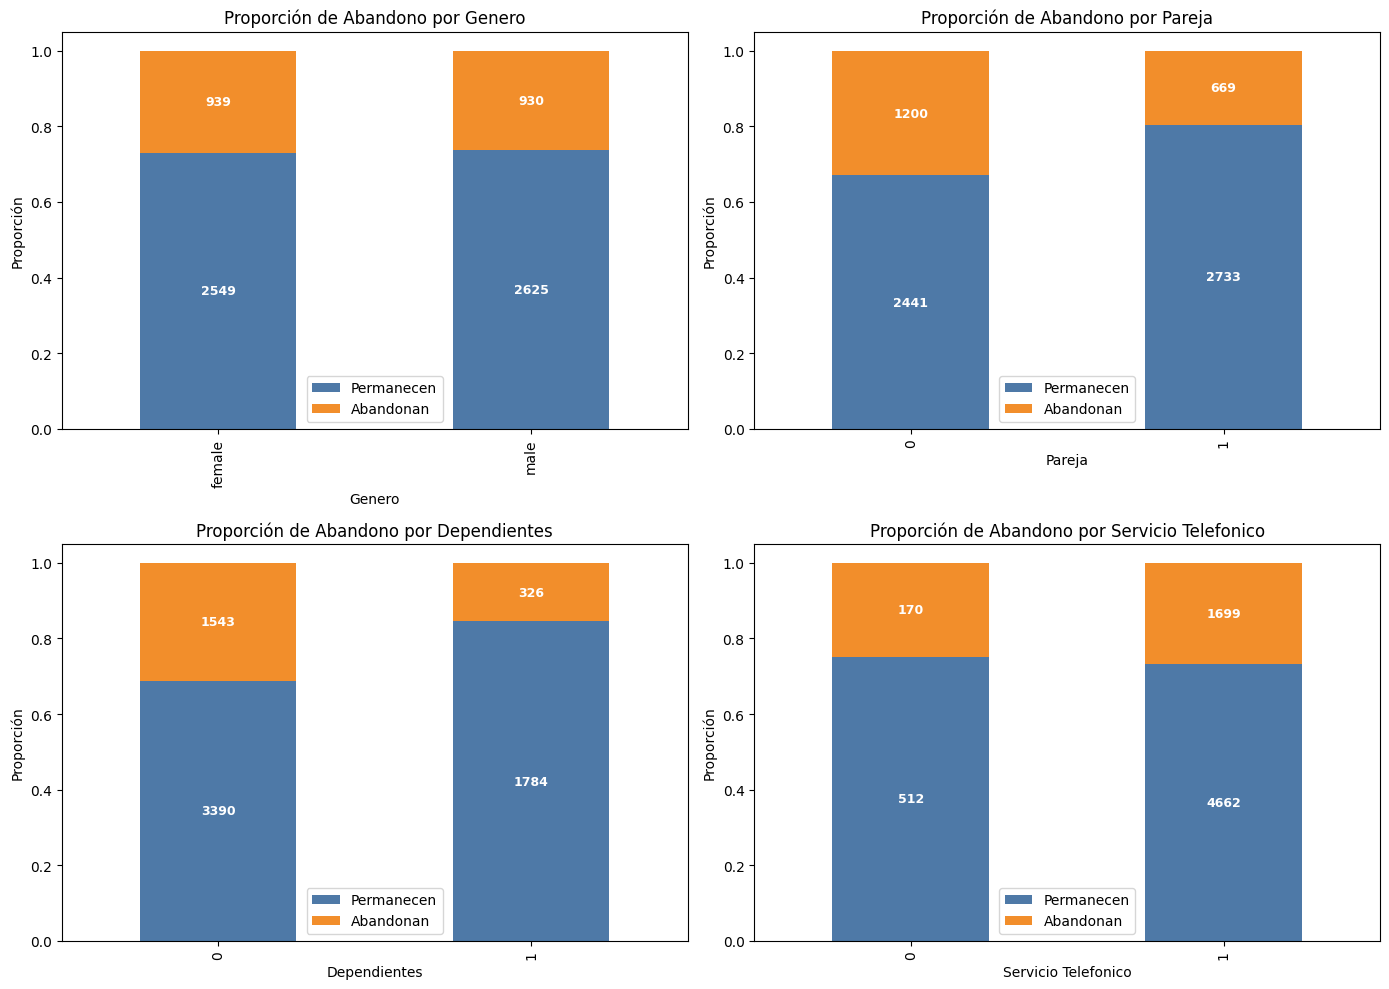

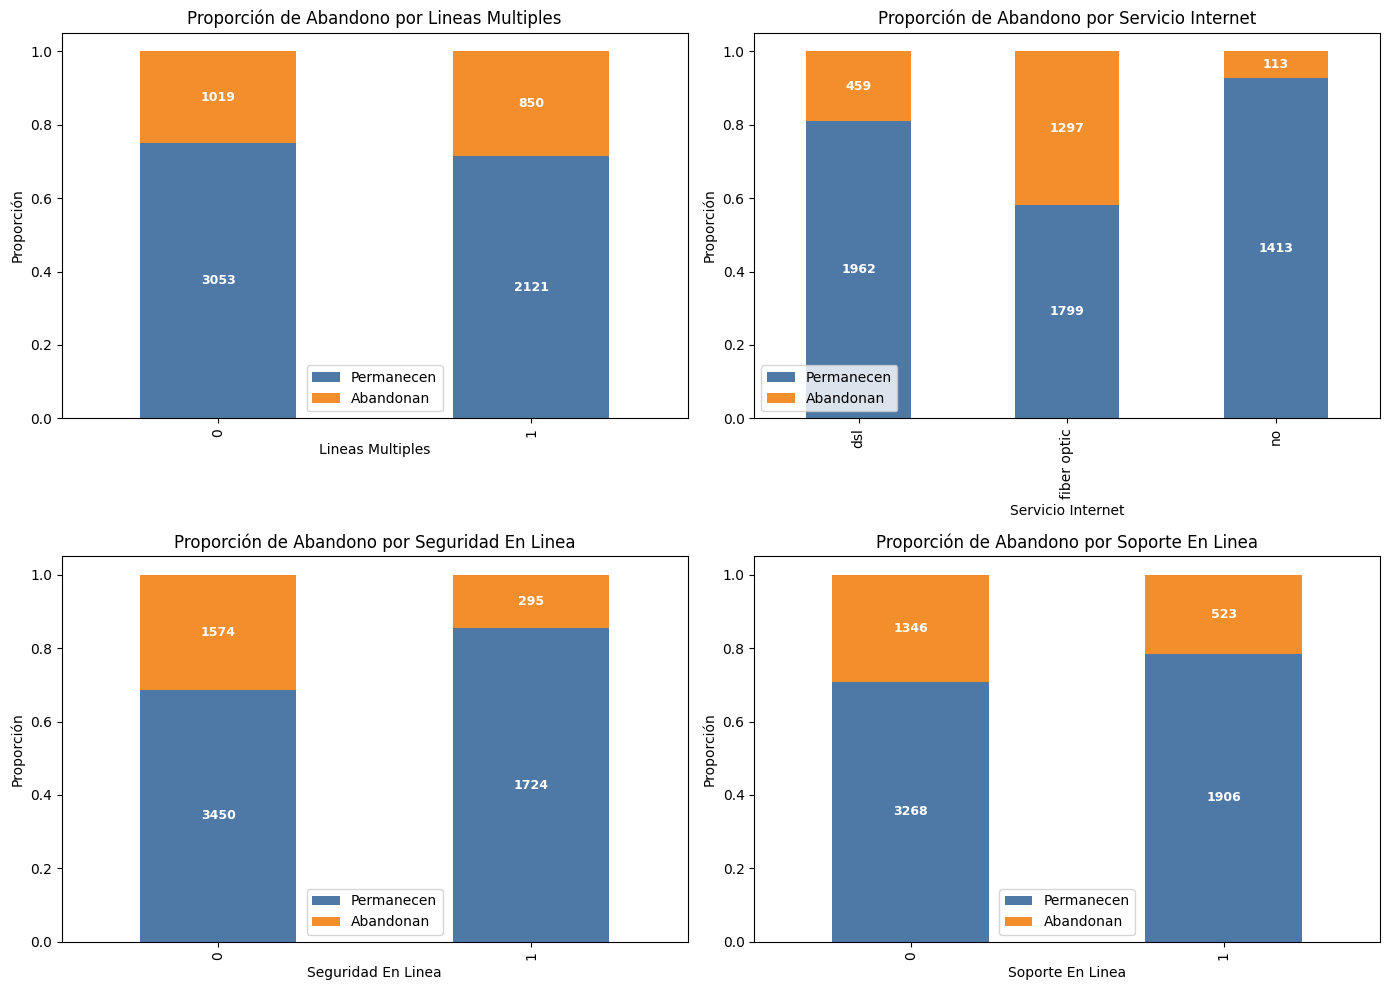

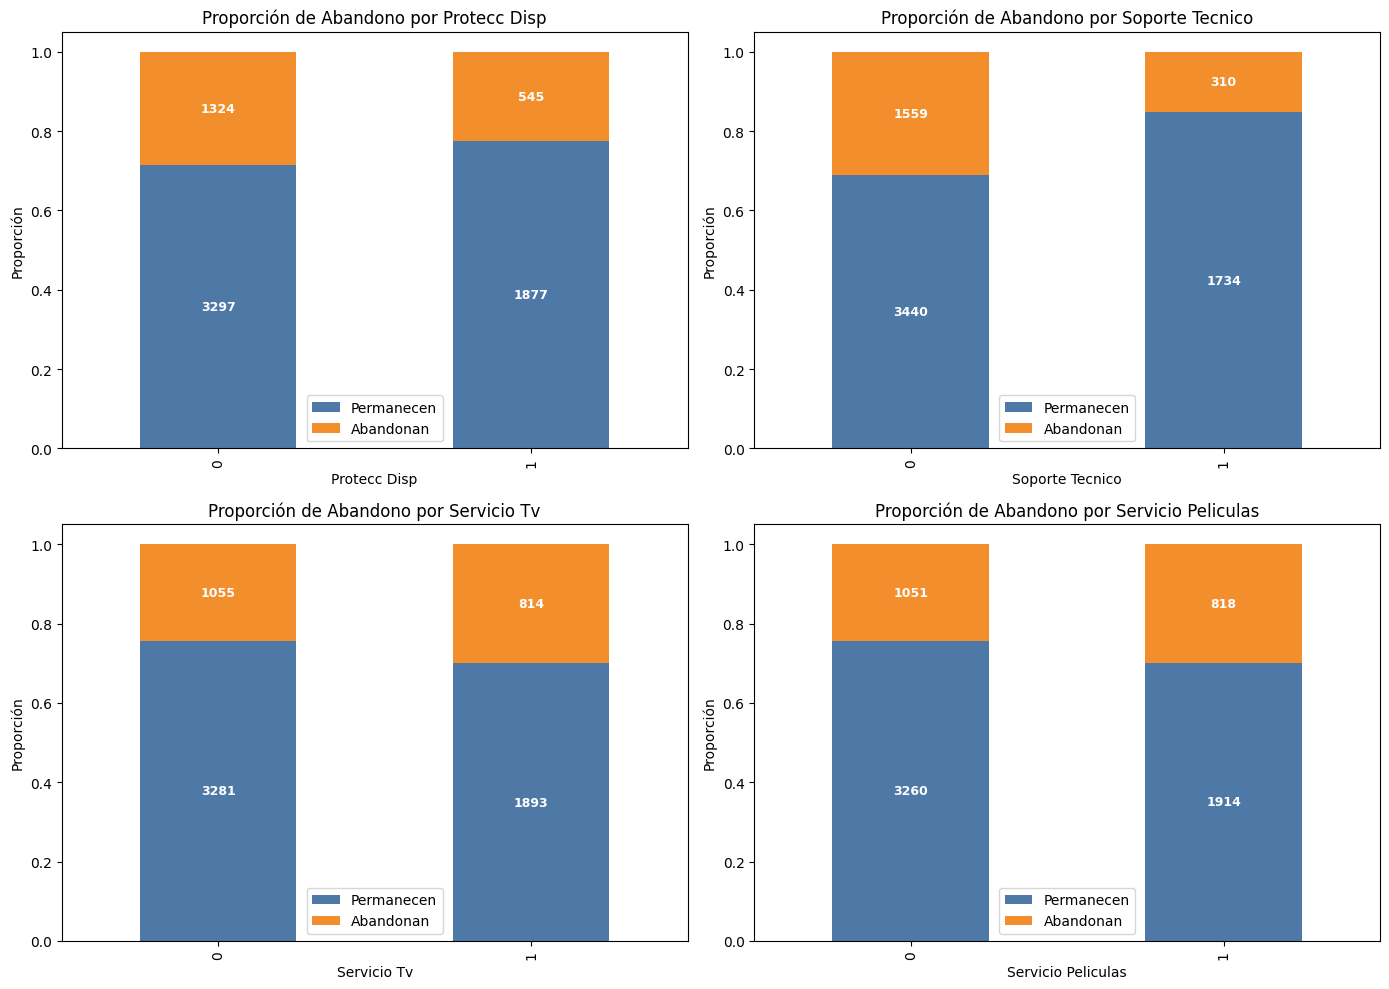

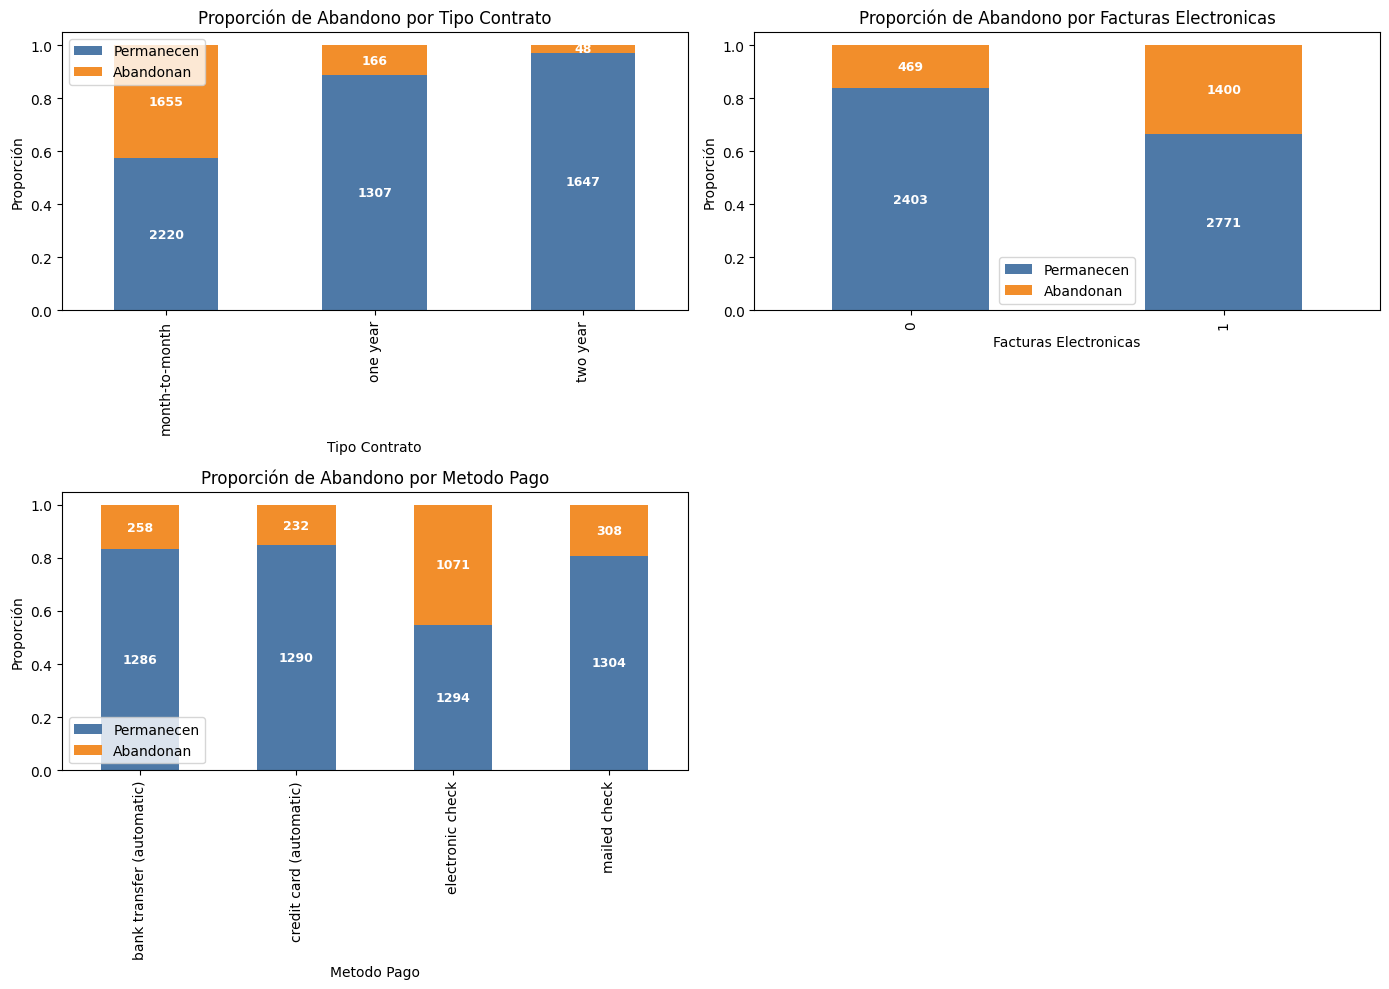

In [43]:
colores = ['#4e79a7', '#f28e2b']

variables_categoricas = [
    'genero', 'pareja', 'dependientes', 'servicio_telefonico',
    'lineas_multiples', 'servicio_internet', 'seguridad_en_linea',
    'Soporte_en_linea', 'protecc_disp', 'soporte_tecnico',
    'servicio_tv', 'servicio_peliculas', 'tipo_contrato',
    'facturas_electronicas', 'metodo_pago'
]

for i in range(0, len(variables_categoricas), 4):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()

    for j in range(4):
        if i + j < len(variables_categoricas):
            col = variables_categoricas[i + j]
            ax = axs[j]

            # Obtenemos las cantidades absolutas y proporciones
            conteos = data_json_norm.groupby(col)['cancelacion'].value_counts().unstack().fillna(0)
            proporciones = conteos.div(conteos.sum(axis=1), axis=0)

            # Graficar proporciones
            proporciones.plot(kind='bar', stacked=True, color=colores, ax=ax)

            # Agregar etiquetas de cantidad en cada barra
            for idx, cat in enumerate(conteos.index):
                total = conteos.loc[cat]
                bottom = 0
                for k, val in enumerate(total):
                    height = proporciones.loc[cat][k]
                    ax.text(
                        idx, bottom + height / 2,
                        f'{int(val)}',
                        ha='center', va='center', color='white', fontsize=9, fontweight='bold'
                    )
                    bottom += height

            ax.set_title(f'Proporción de Abandono por {col.replace("_", " ").title()}')
            ax.set_ylabel('Proporción')
            ax.set_xlabel(col.replace("_", " ").title())
            ax.legend(['Permanecen', 'Abandonan'])
        else:
            fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

### 📄 Informe Final - Proyecto Churn de Clientes | Telecom X

---

### 1. Introducción

Este informe forma parte del proyecto **“Churn de Clientes”** para *Telecom X*, una empresa que enfrenta una preocupante tasa de cancelación de clientes. El objetivo principal es identificar los factores que inciden en la pérdida de usuarios y aportar información estratégica para diseñar acciones que mejoren la **retención**.

La labor de análisis se desarrolló utilizando **Python**, junto con bibliotecas como **Pandas**, **Matplotlib** y **Seaborn**, siguiendo un proceso **ETL (Extracción, Transformación y Carga)** para garantizar la limpieza y estructura de los datos. A través de un **Análisis Exploratorio de Datos (EDA)**, se identificaron patrones clave que servirán de base para implementar modelos predictivos de churn en fases posteriores.

---

### 2. Preparación y Limpieza de Datos

Se realizó una depuración exhaustiva de los datos crudos (formato JSON) para asegurar su calidad antes del análisis. Esta etapa incluyó:

- **Eliminación de valores nulos**: Se identificaron columnas con datos faltantes (como `cargo_total`) y se eliminaron las filas incompletas.
- **Conversión de tipos de datos**: Variables binarias (Yes/No) fueron convertidas a tipo `int64` para facilitar su análisis.
- **Normalización de nombres de columnas**: Se estandarizaron a español, en minúsculas y con guiones bajos.
- **Generación de variables derivadas**:
  - `cargo_diario`: a partir del `cargo_mensual`.
  - `cantidad_servicios`: suma de todos los servicios contratados por cliente.

Este proceso fue esencial para preparar un conjunto de datos robusto y listo para el análisis.

---

### 3. Análisis Exploratorio de Datos (EDA)

Con los datos limpios, se exploraron relaciones entre características de los clientes y su comportamiento de cancelación. Los hallazgos más relevantes fueron:

- **Tasa general de cancelación**: Alrededor del **25% de los clientes abandona** el servicio.
- **Variables categóricas relevantes**:
  - Contratos mensuales tienen mayor proporción de churn.
  - Clientes sin servicios adicionales cancelan más.
  - Quienes pagan mediante métodos electrónicos o automáticos tienden a permanecer más.
- **Variables numéricas destacadas**:
  - Clientes con más **meses de contrato** tienden a permanecer.
  - Un **cargo mensual alto** y **pocos servicios** están relacionados con más cancelación.
- **Matriz de correlación**:
  - `meses_contrato` tuvo la **correlación negativa más fuerte** con churn.
  - `cantidad_servicios` y `cargo_mensual` mostraron relaciones moderadas.

---

### 4. Conclusiones e Insights

El análisis reveló varios factores críticos que influyen en la cancelación:

- **Antigüedad del cliente**:
  - A mayor duración del contrato, menor es el riesgo de churn.
  - Importante promover la fidelización desde etapas tempranas.
- **Costo del servicio**:
  - Un cargo mensual elevado podría estar vinculado a percepciones de alto costo.
- **Cantidad de servicios contratados**:
  - A mayor cantidad de servicios, mayor es la permanencia.
  - Estrategias de “venta cruzada” o paquetes podrían mejorar la retención.
- **Factores personales**:
  - Clientes con **pareja** o **dependientes** cancelan menos, posiblemente por mayor uso compartido o compromiso familiar.

---

### 5. Recomendaciones

Basado en estos hallazgos, se sugieren los siguientes pasos:

1. **Desarrollar un modelo predictivo de churn**, usando las variables más influyentes.
2. **Diseñar campañas de retención dirigidas** a segmentos en riesgo (pocos servicios, contrato mensual, alta factura).
3. **Mejorar el onboarding de nuevos clientes**, con foco en convertirlos en usuarios de largo plazo.
4. **Revisar precios y percepción de valor**, especialmente para clientes de alto cargo mensual.

Este análisis ofrece una base sólida para avanzar hacia estrategias **basadas en datos** que ayuden a **reducir la pérdida de clientes** y **mejorar la fidelización** en Telecom X.
